In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import copy

In [2]:
try:
    data = pd.read_csv('E:\\DataSet.csv')
except:
    print("file not found...")

In [3]:
data.rename({'iyear':'year','imonth':'month','iday':'day','country_txt':'country','attacktype1_txt':'attack',\
             'targtype1_txt':'target', 'corp1':'target_inst', 'target1':'target_pop', 'natlty1_txt':'nationality',\
             'gname':'group','weaptype1_txt':'weapon_type', 'weapsubtype1_txt':'weapon_subtype', 'nkill':'kill', \
             'nwound':'wound','propextent_txt':'property_damg', 'ransomamt':'ransom'},axis='columns',inplace=True)

In [4]:
# Sum of null value in each column
data.isnull().sum()

year                  0
month                 0
day                   0
country               0
city                  0
attack                0
target                0
target_inst           0
target_pop            0
nationality         573
group                 0
weapon_type           0
weapon_subtype     4569
weapdetail        26930
kill               2625
wound              4602
property_damg     28300
ransom            43642
dtype: int64

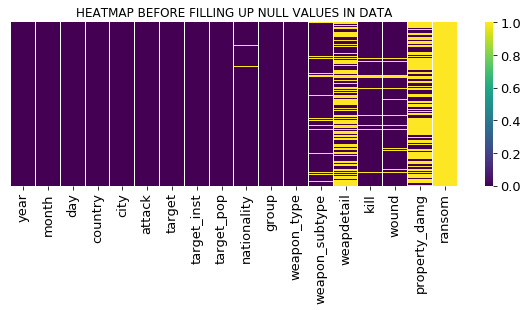

In [5]:
plt.figure(figsize=(10,3))
plt.rcParams['axes.labelsize']=15
plt.rcParams['ytick.labelsize']=13
plt.rcParams['xtick.labelsize']=13
plt.title('HEATMAP BEFORE FILLING UP NULL VALUES IN DATA')
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [6]:
# Dealing with the null values of nationality
data[['country','nationality']].head(10)

,country,nationality
0,Kenya,Kenya
1,Pakistan,Pakistan
2,Kenya,Kenya
3,Afghanistan,International
4,Democratic Republic of the Congo,Democratic Republic of the Congo
5,United States,United States
6,India,India
7,Afghanistan,Afghanistan
8,Senegal,Senegal
9,Somalia,Somalia


In [7]:
def impute_nationality(cols):
    Country = cols[0]
    Nationality = cols[1]
    if pd.isnull(Nationality):
        return Country
    else:
        return Nationality

In [8]:
data['nationality'] = data[['country','nationality']].apply(impute_nationality, axis = 1)
data[['nationality','country']].head(10)

,nationality,country
0,Kenya,Kenya
1,Pakistan,Pakistan
2,Kenya,Kenya
3,International,Afghanistan
4,Democratic Republic of the Congo,Democratic Republic of the Congo
5,United States,United States
6,India,India
7,Afghanistan,Afghanistan
8,Senegal,Senegal
9,Somalia,Somalia


In [9]:
data.drop_duplicates(inplace=True)
print('The no. of duplicates in the data are',data.duplicated().sum())

The no. of duplicates in the data are 0


In [10]:
print(data['attack'].unique())
print('\nThere are',len(data['attack'].unique()),'unique values in attack column')

['Armed Assault' 'Bombing/Explosion' 'Facility/Infrastructure Attack'
 'Assassination' 'Unknown' 'Hostage Taking (Kidnapping)' 'Hijacking'
 'Hostage Taking (Barricade Incident)' 'Unarmed Assault']

There are 9 unique values in attack column


In [11]:
# Making a list of unique weapon type
# and forming columns for the unique values of weapon_type
wp_tp = pd.get_dummies(data['weapon_type'],drop_first=True)
list_wp_type = list(wp_tp.columns)
print('The values of column head are',list_wp_type)

The values of column head are ['Chemical', 'Explosives/Bombs/Dynamite', 'Fake Weapons', 'Firearms', 'Incendiary', 'Melee', 'Other', 'Sabotage Equipment', 'Unknown', 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)']


In [12]:
# Making a new copy of the Data
data2 = copy.deepcopy(data)
data2 = pd.concat([data2,wp_tp],axis=1)

,Chemical,Explosives/Bombs/Dynamite,Fake Weapons,Firearms,Incendiary,Melee,Other,Sabotage Equipment,Unknown,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
attack,,,,,,,,,,
Armed Assault,0.0,1191.0,0.0,8280.0,209.0,460.0,0.0,0.0,0.0,0.0
Assassination,2.0,685.0,0.0,1545.0,9.0,71.0,1.0,0.0,105.0,1.0
Bombing/Explosion,31.0,20414.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Facility/Infrastructure Attack,0.0,0.0,0.0,296.0,1530.0,11.0,5.0,18.0,191.0,5.0
Hijacking,0.0,8.0,1.0,78.0,5.0,0.0,0.0,0.0,32.0,0.0
Hostage Taking (Barricade Incident),0.0,61.0,0.0,92.0,17.0,11.0,0.0,0.0,16.0,0.0
Hostage Taking (Kidnapping),3.0,132.0,0.0,1923.0,77.0,295.0,18.0,1.0,1350.0,0.0
Unarmed Assault,36.0,0.0,0.0,0.0,12.0,107.0,8.0,0.0,0.0,49.0
Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2552.0,0.0


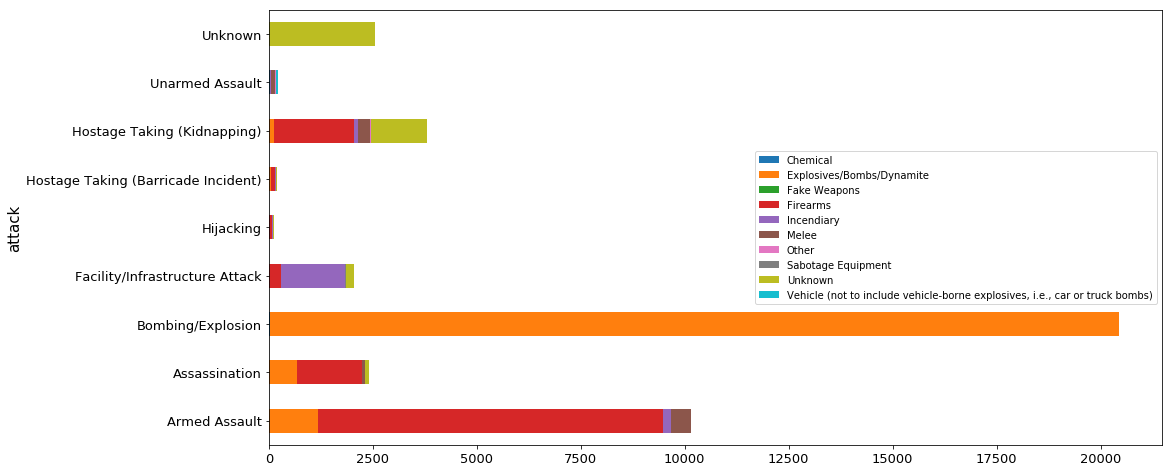

In [13]:
data2.groupby('attack').sum().reset_index().plot.barh(x='attack',y=list_wp_type,figsize=(16,8),stacked=True)
plt.legend(loc=5)
data2.groupby('attack').sum()[list_wp_type]

In [14]:
data['attack'].value_counts(ascending=True).to_frame().reset_index().rename({'index':'attack','attack':'counts'})

,index,attack
0,Hijacking,124
1,Hostage Taking (Barricade Incident),197
2,Unarmed Assault,215
3,Facility/Infrastructure Attack,2056
4,Assassination,2419
5,Unknown,2552
6,Hostage Taking (Kidnapping),3799
7,Armed Assault,10140
8,Bombing/Explosion,20445


In [15]:
# impute_nationality function will be applied te replace the null values in nationality column
def impute_weapon_type(cols):
    weapons = {'Armed Assault':'Firearms',
               'Bombing/Explosion':'Explosives/Bombs/Dynamite',
               'Facility/Infrastructure Attack':'Incendiary',
               'Assassination':'Firearms',
               'Hostage Taking (Kidnapping)':'Firearms',
               'Hijacking':'Firearms',
               'Unknown':'Unknown',
               'Hostage Taking (Barricade Incident)':'Firearms',
               'Unarmed Assault':'Melee'}
    Attack = cols[0]
    wpType = cols[1]
    if pd.isnull(wpType):
        return weapons[Attack]
    else:
        return wpType

In [16]:
# Perform the replacement 
data['weapon_type'] = data[['attack','weapon_type']].apply(impute_weapon_type, axis = 1)
data[['attack','weapon_type']].head()

,attack,weapon_type
0,Armed Assault,Explosives/Bombs/Dynamite
1,Bombing/Explosion,Explosives/Bombs/Dynamite
2,Armed Assault,Explosives/Bombs/Dynamite
3,Bombing/Explosion,Explosives/Bombs/Dynamite
4,Facility/Infrastructure Attack,Incendiary


In [17]:
data.drop(data.loc[(data.kill.isnull())&(data.wound.isnull())].index,inplace = True)

In [18]:
data.drop(data.loc[(data.kill.isnull())&(data.group=='Unknown')].index,inplace=True)

In [19]:
#Create a dataframe dd to store the mean of kill and wound based on weapon_subtype
dd = data.groupby('weapon_subtype').mean()[['kill','wound']].reset_index()
dd = dd.astype({'kill':int,'wound':int},inplace=True)
dd

,weapon_subtype,kill,wound
0,Arson/Fire,1,0
1,Automatic Weapon,3,2
2,Blunt Object,0,2
3,Dynamite/TNT,0,0
4,Explosive,2,66
5,Gasoline or Alcohol,0,1
6,Grenade,1,3
7,Handgun,1,1
8,"Hands, Feet, Fists",0,2
9,Knife or Other Sharp Object,2,1


In [20]:
# We will remove the remaining null values in kill and wound by mean values
def impute_kill(cols):
    kill = cols[0]
    wp_sb = cols[1]
    if pd.isnull(kill):
        return dd[dd.weapon_subtype==wp_sb].kill.sum()
    else: 
        return kill

def impute_wound(cols):
    wound = cols[0]
    wp_sb = cols[1]
    if pd.isnull(wound):
        
        return dd[dd.weapon_subtype==wp_sb].wound.sum()
    else:
        return wound

In [21]:
data['kill']=data[['kill','weapon_subtype']].apply(impute_kill,axis=1)

In [22]:
data['wound']=data[['wound','weapon_subtype']].apply(impute_wound,axis=1)

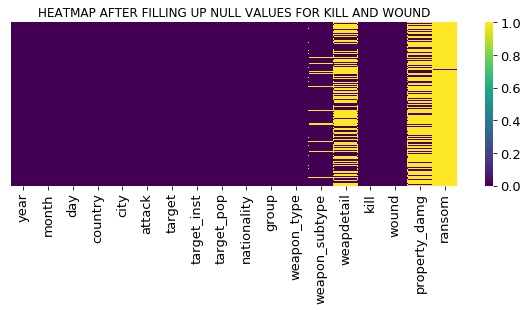

In [23]:
plt.figure(figsize=(10,3))
plt.rcParams['axes.labelsize']=15
plt.rcParams['ytick.labelsize']=13
plt.rcParams['xtick.labelsize']=13
plt.title('HEATMAP AFTER FILLING UP NULL VALUES FOR KILL AND WOUND')
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [24]:
data['weapon_subtype'].fillna('Unknown', inplace = True)
data['weapdetail'].fillna('Unknown', inplace = True)
data['ransom'].fillna(0, inplace = True)
data['property_damg'].fillna('no record', inplace = True)

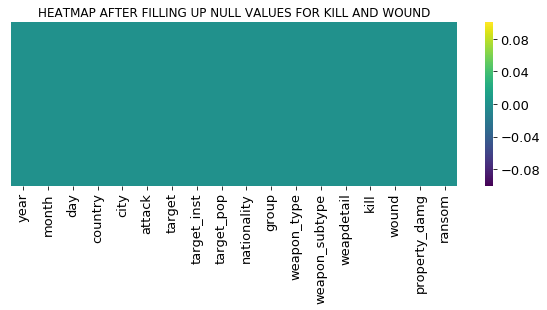

In [25]:
plt.figure(figsize=(10,3))
plt.rcParams['axes.labelsize']=15
plt.rcParams['ytick.labelsize']=13
plt.rcParams['xtick.labelsize']=13
plt.title('HEATMAP AFTER FILLING UP NULL VALUES FOR KILL AND WOUND')
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [26]:
data['casualties']=data['kill']+data['wound']

# TERRORISM IN PAKISTAN

In [27]:
pak=data[data.country=='Pakistan']

In [28]:
pak.describe()

,year,month,day,kill,wound,ransom,casualties
count,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3.152000e+03,3152.000000
mean,2014.581853,6.130711,15.694797,2.195431,3.355964,1.404150e+04,5.551396
std,1.269079,3.458699,8.830906,6.437987,12.437832,5.626958e+05,17.720293
min,2012.000000,1.000000,1.000000,0.000000,0.000000,-9.900000e+01,0.000000
25%,2014.000000,3.000000,8.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,2015.000000,6.000000,16.000000,1.000000,0.000000,0.000000e+00,1.000000
75%,2016.000000,9.000000,23.000000,2.000000,2.000000,0.000000e+00,4.000000
max,2016.000000,12.000000,31.000000,158.000000,351.000000,3.000000e+07,430.000000


* Maximum people ever wounded in an event is 351
* Maximum ransom amount ever asked was 3 Crores!
* An event witnessed 430 casualties!

<Figure size 720x360 with 0 Axes>

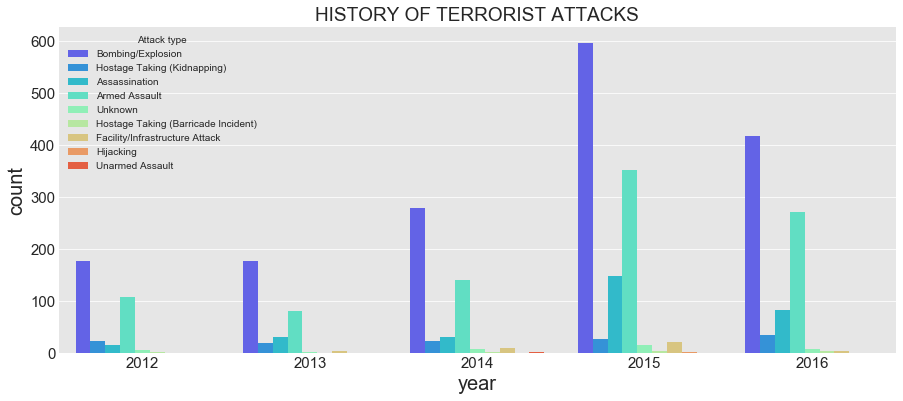

In [29]:
plt.figure(figsize=(10,5))
plt.rcParams['axes.labelsize']=20
plt.rcParams['axes.titlesize']=19
plt.rcParams['ytick.labelsize']=15
plt.rcParams['xtick.labelsize']=15
sns.set_style('darkgrid',{'axes.facecolor':'.9'})
plt.figure(figsize=(15,6))
sns.countplot(x=pak.year,hue = 'attack', data = pak, palette = 'rainbow')
plt.title("HISTORY OF TERRORIST ATTACKS")
plt.legend(title='Attack type',loc=2)

* Shows more than two fold rise in attacks in year 2015, with a slight decrease in 2016 
* Terrorism in Pakistan show somewhat same trend as seen globally i.e, bombing/Explosion topped in Attack type followed by Armed Assault in each year

In [30]:
max_killed = pak['kill'].max()
idx = pak.loc[pak.kill==max_killed].index[0]
print('Maximum people killed in an attack are',max_killed,\
      '\nin the',pak.at[idx,'city'],\
     '\nwhich was carried by',pak.at[idx,'group'],'using',pak.at[idx,'weapon_type'],\
     '\nand maximum people killed were',pak.at[idx,'target'],'who were attack with',pak.at[idx,'attack'])

Maximum people killed in an attack are 158.0 
in the Peshawar 
which was carried by Tehrik-i-Taliban Pakistan (TTP) using Explosives/Bombs/Dynamite 
and maximum people killed were Educational Institution who were attack with Hostage Taking (Barricade Incident)


In [31]:
print("The no. of Terrorist groups in Pakistan is",len(pak['group'].unique()))

The no. of Terrorist groups in Pakistan is 61


** Top 10 Terrorist Groups with casualties**

In [32]:
grp_cas = pak[pak['group'].isin(pak['group'].value_counts()[0:10].index)][['group','casualties']].groupby('group').sum().reset_index()
grp_cas.sort_values(by='casualties',ascending=False)

,group,casualties
7,Tehrik-i-Taliban Pakistan (TTP),7792.0
9,Unknown,2092.0
5,Lashkar-e-Jhangvi,1866.0
8,United Baloch Army (UBA),673.0
4,Lashkar-e-Islam (Pakistan),574.0
2,Baloch Republican Army (BRA),573.0
3,Khorasan Chapter of the Islamic State,536.0
0,Baloch Liberation Army (BLA),435.0
1,Baloch Liberation Front (BLF),391.0
6,Sindhu Desh Liberation Army (SDLA),71.0


** Top 10 Terrorist Groups with attack count**

In [33]:
grp_cnt=pak[pak['group'].isin(pak['group'].value_counts()[0:10].index)]['group'].value_counts().to_frame().reset_index()\
.rename(columns={'index':'group','group':'count_of_attack'})
grp_cnt

,group,count_of_attack
0,Unknown,1368
1,Tehrik-i-Taliban Pakistan (TTP),679
2,Baloch Republican Army (BRA),233
3,Baloch Liberation Front (BLF),144
4,Baloch Liberation Army (BLA),97
5,Lashkar-e-Jhangvi,87
6,United Baloch Army (UBA),78
7,Lashkar-e-Islam (Pakistan),77
8,Sindhu Desh Liberation Army (SDLA),49
9,Khorasan Chapter of the Islamic State,48


In [34]:
grp = grp_cas.merge(grp_cnt, on = 'group').sort_values(by='casualties',ascending=False)
grp

,group,casualties,count_of_attack
7,Tehrik-i-Taliban Pakistan (TTP),7792.0,679
9,Unknown,2092.0,1368
5,Lashkar-e-Jhangvi,1866.0,87
8,United Baloch Army (UBA),673.0,78
4,Lashkar-e-Islam (Pakistan),574.0,77
2,Baloch Republican Army (BRA),573.0,233
3,Khorasan Chapter of the Islamic State,536.0,48
0,Baloch Liberation Army (BLA),435.0,97
1,Baloch Liberation Front (BLF),391.0,144
6,Sindhu Desh Liberation Army (SDLA),71.0,49


* Tehrik-i-Taliban Pakistan (TTP) tops the list in terms of casualities 
* Lashkar-e-Jhangvi,United Baloch Army (UBA),Lashkar-e-Islam (Pakistan), Baloch Liberation Army (BLA) and Khorasan Chapter of the Islamic State caused alot of casualities in much less number of attacks

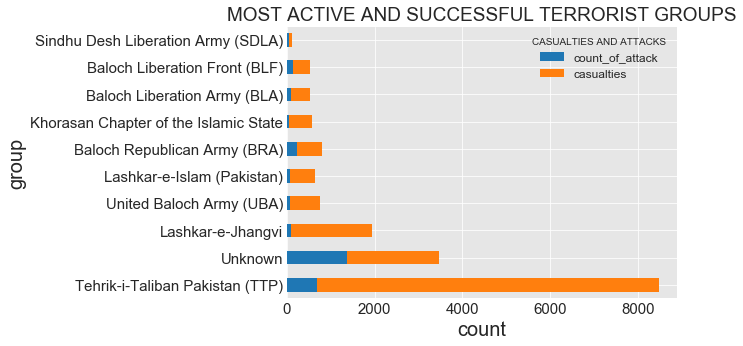

In [35]:
ax = grp.plot.barh(x='group',y=['count_of_attack','casualties'],stacked=True,figsize=(7,5))
ax.set_title("MOST ACTIVE AND SUCCESSFUL TERRORIST GROUPS")
ax.set_xlabel('count')
plt.legend(title="CASUALTIES AND ATTACKS",loc=0,fontsize='large')

* Tehrik-i-Taliban Pakistan (TTP) and other groups caused great human loss in less attacks. It proves they have been very successful in their attempts.

Text(0.5,1,'MOST TARGETED CITIES')

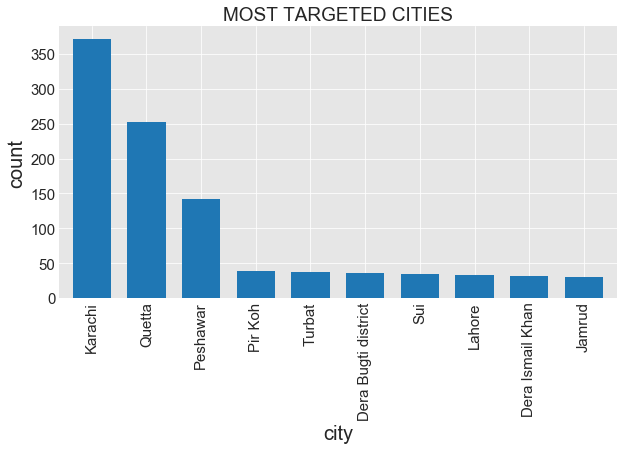

In [36]:
pak[pak['city'].isin(pak['city'].value_counts()[0:10].index)]['city'].value_counts().to_frame().plot.bar(figsize=(10,5),width=0.7,legend=False)
plt.xlabel('city')
plt.ylabel('count')
plt.title("MOST TARGETED CITIES")

Karachi is the most targeted city.It might be because it is the most populous city,home to two largest seaports and home to the most busiest airport of the Pakistan,Jinnah International Airport. It is also the premier industrial and financial centre and most cosmopolitan city of the country. It was also the first capital of the country.

Text(0.5,1,'TERRORIST GROUPS AND THEIR ATTACK TYPE')

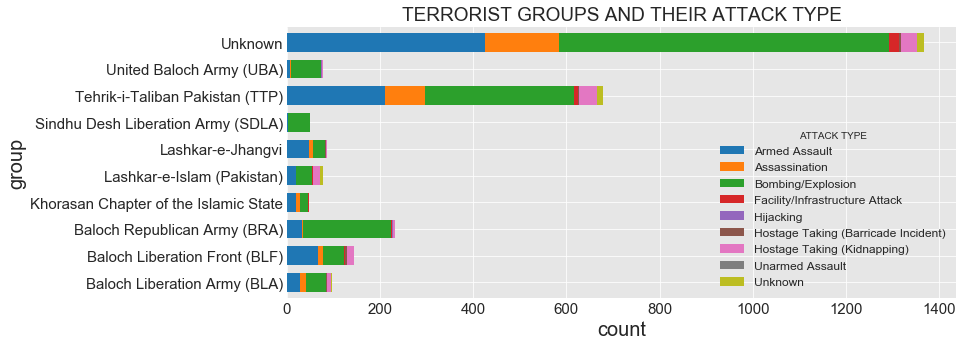

In [37]:
p1=pak[pak['group'].isin(pak['group'].value_counts()[0:10].index)]
pd.crosstab(p1['group'],p1['attack']).plot.barh(stacked=True,figsize=(12,5),width=0.7)
plt.legend(title="ATTACK TYPE",loc=4,fontsize='large')
plt.xlabel('count')
plt.title('TERRORIST GROUPS AND THEIR ATTACK TYPE')

* Bombing/explosion and armed assault has been extensively used by groups
* Even the most successful terrorist group in country Tehrik-i-Taliban Pakistan (TTP) used the same

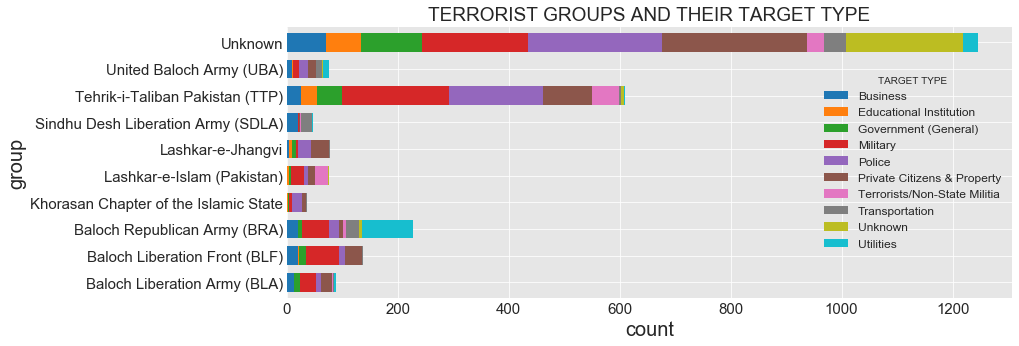

In [38]:
p1=p1[p1['target'].isin(p1['target'].value_counts()[0:10].index)]
pd.crosstab(p1['group'],p1['target']).plot.barh(stacked=True,figsize=(13,5),width=0.7)
plt.xlabel('count')
plt.title('TERRORIST GROUPS AND THEIR TARGET TYPE')
plt.legend(title="TARGET TYPE",loc=7,fontsize='large')

* The Unknown groups have targeted almost all types.
* Tehrik-i-Taliban Pakistan (TTP) seem to target the defence force of the country extensively. 
* Military system,private citizens and property are attacked almost by all groups.

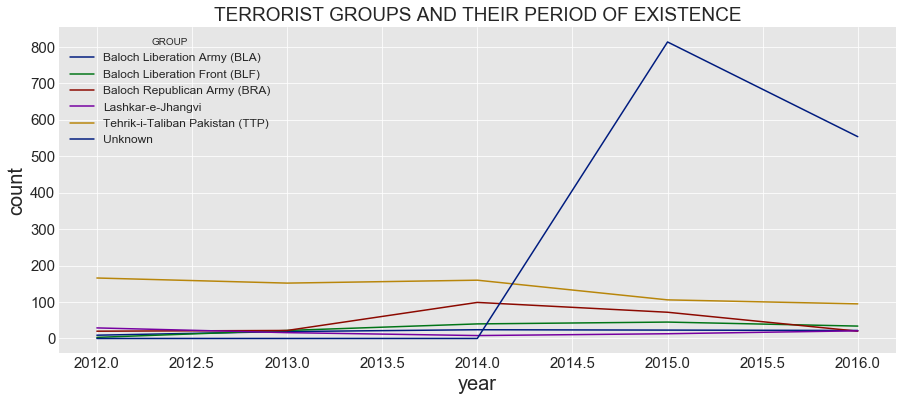

In [39]:
sns.set_style('darkgrid',{'axes.facecolor':'.9'})
pd.crosstab(pak[pak['group'].isin(pak['group'].value_counts()[0:6].index)]['year'],pak[pak['group'].isin(pak['group'].value_counts()[0:6].index)]['group']).plot(color=sns.color_palette('dark',5),figsize=(15,6))
plt.ylabel('count')
plt.title('TERRORIST GROUPS AND THEIR PERIOD OF EXISTENCE')
plt.legend(title="GROUP",loc=0,fontsize='large')

* The TTP has been the most active group since 2012 until 2014 where it showed a slight decrease 
* The Unknown groups show sharp rise in their attacks in 2015.

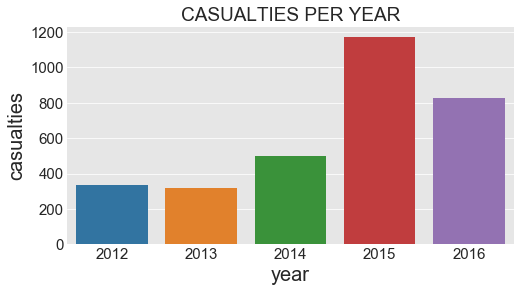

In [40]:
plt.figure(figsize=(8,4))
plt.title('CASUALTIES PER YEAR')
p1=pak['year'].value_counts().to_frame().reset_index().rename(columns={'index':'year','year':'casualties'}).sort_values(by='year')
sns.barplot(data=p1,x='year',y='casualties',ci=None)

2015 was the worst year for the country with casualties more than double in past three years

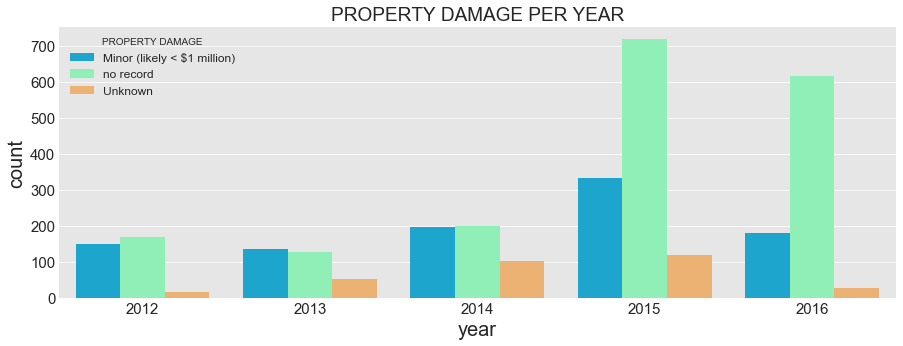

In [41]:
plt.figure(figsize=(15,5))
plt.title('PROPERTY DAMAGE PER YEAR')
sns.countplot(x='year',hue='property_damg',data=pak,palette='rainbow')
plt.legend(title="PROPERTY DAMAGE",loc=0,fontsize='large')

2015 saw most property damage

In [42]:
len(pak.weapon_type.unique())

6

Text(0.5,0.98,'Weapon Type used by Top 10 Terrorist Group')

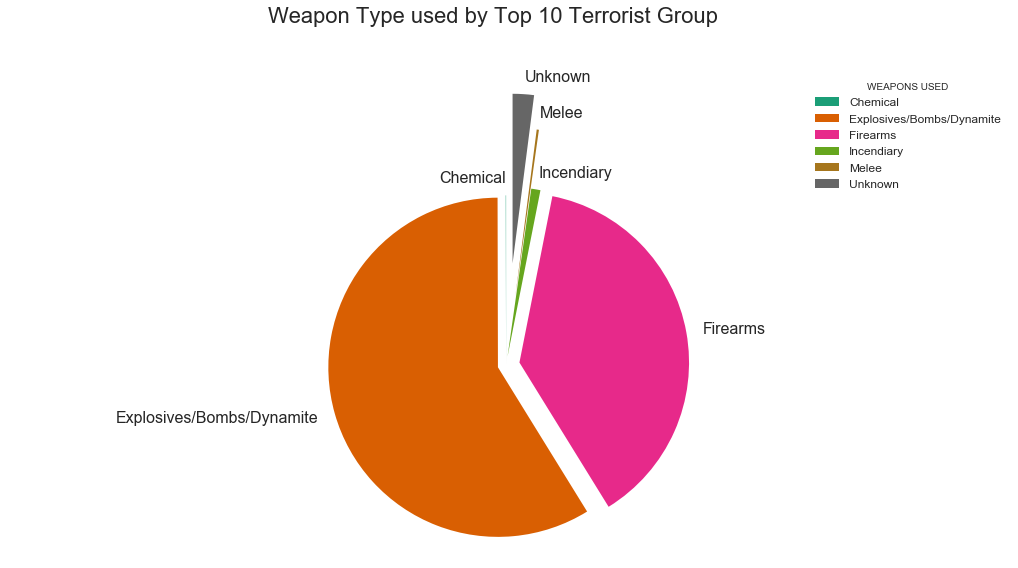

In [43]:
explode=(0.0, 0.05, 0.08, 0.05, 0.4,0.6)
v1=pak[pak['group'].isin(pak['group'].value_counts()[0:10].index)]
xattack=pd.crosstab(v1['weapon_type'],v1['group'],margins='All')
xattack
xattack=xattack[0:-1]
xattack.rename(columns={'All':''},inplace=True)
xattack.plot.pie(shadow=False,legend=False,y='',startangle=90,fontsize=16,figsize=(18,9),cmap='Dark2',grid=True,explode=explode)
plt.axis('equal')
plt.legend(title="WEAPONS USED",loc='best',fontsize='large')
plt.suptitle('Weapon Type used by Top 10 Terrorist Group',fontsize = 22)

More than 50% of the attacks used Explosives/Bombs/Dynamites.

In [44]:
print('Total Number of groups',pak.country.count())
p1=pak[pak.nationality=='Pakistan']
print('Number of groups with nationality as Pakistan:',p1.year.count())
print('% of terrorist groups in Pakistan belonging to Pakistan itself {0:.2f} %:'.format(p1.year.count()/pak.country.count()*100))

Total Number of groups 3152
Number of groups with nationality as Pakistan: 3094
% of terrorist groups in Pakistan belonging to Pakistan itself 98.16 %:


# TERRORISM IN NIGERIA

In [45]:
nig=data[data.country=='Nigeria']
nig.describe()

,year,month,day,kill,wound,ransom,casualties
count,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2.183000e+03,2183.000000
mean,2014.206596,6.063216,15.646358,8.240495,3.794320,1.786255e+03,12.034814
std,1.375747,3.420250,8.973711,17.991070,12.618978,6.557930e+04,24.562248
min,2012.000000,1.000000,1.000000,0.000000,0.000000,-9.900000e+01,0.000000
25%,2013.000000,3.000000,8.000000,1.000000,0.000000,0.000000e+00,1.000000
50%,2014.000000,6.000000,15.000000,3.000000,1.000000,0.000000e+00,4.000000
75%,2015.000000,9.000000,24.000000,8.000000,2.000000,0.000000e+00,12.000000
max,2016.000000,12.000000,31.000000,315.000000,270.000000,3.029020e+06,392.000000


* An attack holds the casualty record of 392 !
* Mean killings per attack is 8,while mean wounded per attack is 4 

In [46]:
max_killed = nig['kill'].max()
idx = nig.loc[nig.kill==max_killed].index[0]
print('Maximum people killed in an attack are',max_killed,\
      '\nin the',nig.at[idx,'city'],\
     '\nwhich was carried by',nig.at[idx,'group'],'using',nig.at[idx,'weapon_type'],\
     '\nand maximum people killed were',nig.at[idx,'target'],'who were attacked with',nig.at[idx,'attack'])

Maximum people killed in an attack are 315.0 
in the Gamboru Ngala 
which was carried by Boko Haram using Explosives/Bombs/Dynamite 
and maximum people killed were Private Citizens & Property who were attacked with Armed Assault


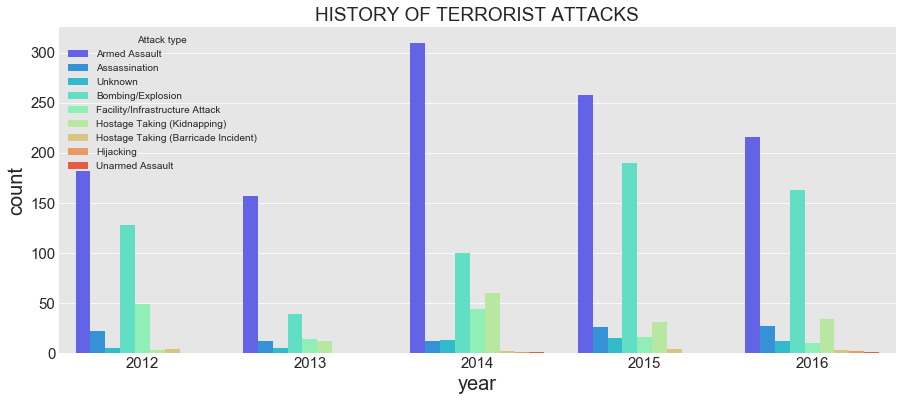

In [47]:
plt.figure(figsize=(15,6))
sns.countplot(x=nig.year,hue = 'attack', data = nig, palette = 'rainbow')
plt.title("HISTORY OF TERRORIST ATTACKS")
plt.legend(title='Attack type',loc=2)

* After 2014 there has been slight decrease in attacks. 2013 saw comparitively less attacks among others
* 2014 was the worst year for Nigeria as the attack frequency was highest.
* Armed assault extensively used

Text(0.5,1,'MOST TARGETED CITIES')

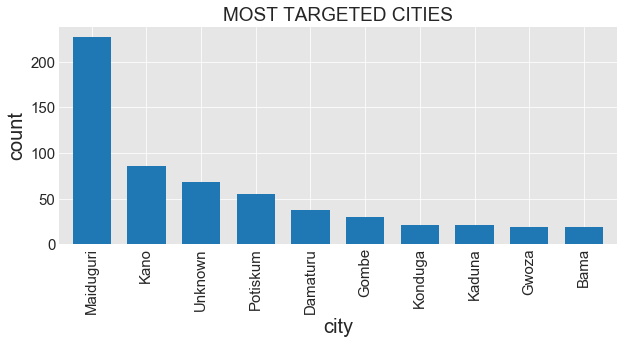

In [48]:
nig[nig['city'].isin(nig['city'].value_counts()[0:10].index)]['city'].value_counts().to_frame().plot.bar(figsize=(10,4),width=0.7,legend=False)
plt.xlabel('city')
plt.ylabel('count')
plt.title("MOST TARGETED CITIES")

Maiduguri is the epicentre of most attacks.

In [49]:
print("The no. of Terrorist groups in Nigeria is",len(nig['group'].unique()))

The no. of Terrorist groups in Nigeria is 25


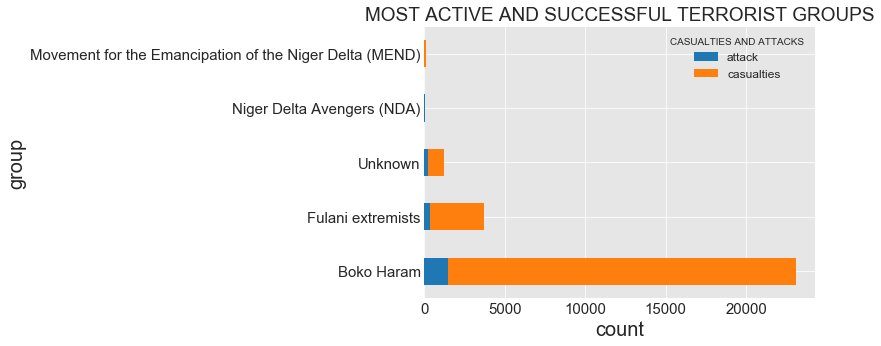

In [50]:
nig[nig['group'].isin(nig['group'].value_counts()[0:5].index)][['group','casualties']].groupby('group').sum()\
.merge(nig[nig['group'].isin(nig['group'].value_counts()[0:5].index)]['group'].value_counts().to_frame().reset_index()\
.rename(columns={'index':'group','group':'attack'}), on='group')\
.sort_values(by='attack',ascending=False).plot.barh(x='group',y=['attack','casualties'],figsize=(7,5),stacked=True,width=0.5)
plt.title("MOST ACTIVE AND SUCCESSFUL TERRORIST GROUPS")
plt.xlabel('count')
plt.legend(title="CASUALTIES AND ATTACKS",loc=0,fontsize='large')

* Boko Haram is the most successful terrorist group, followed by Fulani extremists. 
* Boko Haram ,which originates from West Africa, seems to be the most prevalent terrorist group in the country.

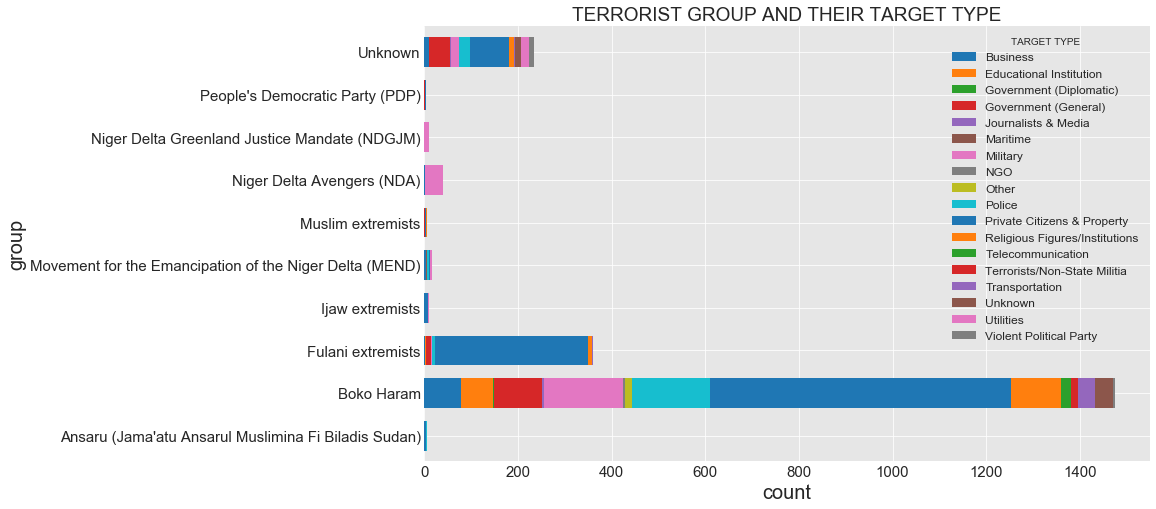

In [51]:
nig=nig[nig['group'].isin(nig['group'].value_counts()[0:10].index)]
pd.crosstab(nig['group'],nig['target']).plot.barh(stacked=True,figsize=(13,8),width=0.7)
plt.xlabel('count')
plt.title('TERRORIST GROUP AND THEIR TARGET TYPE')
plt.legend(title="TARGET TYPE",loc=0,fontsize='large')

Boko Haram and Fulani extremists have majorly attacked private citizens and property. Military,police and utilities are victomized too.

Text(0.5,1,'TERRORIST GROUP AND THEIR ATTACK TYPE')

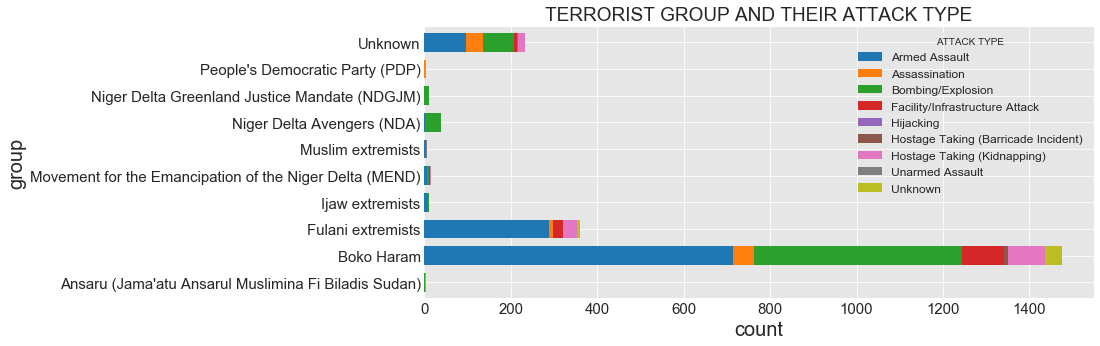

In [52]:
n1=nig[nig['group'].isin(nig['group'].value_counts()[0:10].index)]
pd.crosstab(n1['group'],n1['attack']).plot.barh(stacked=True,figsize=(12,5),width=0.7)
plt.legend(title="ATTACK TYPE",loc=0,fontsize='large')
plt.xlabel('count')
plt.title('TERRORIST GROUP AND THEIR ATTACK TYPE')

Armed assault and bombing/explosion extensively used by Boko Haram.

In [53]:
len(nig.weapon_type.unique())

6

Text(0.5,1,'Weapon Type used by Top 10 Terrorist Group(Pie Chart)')

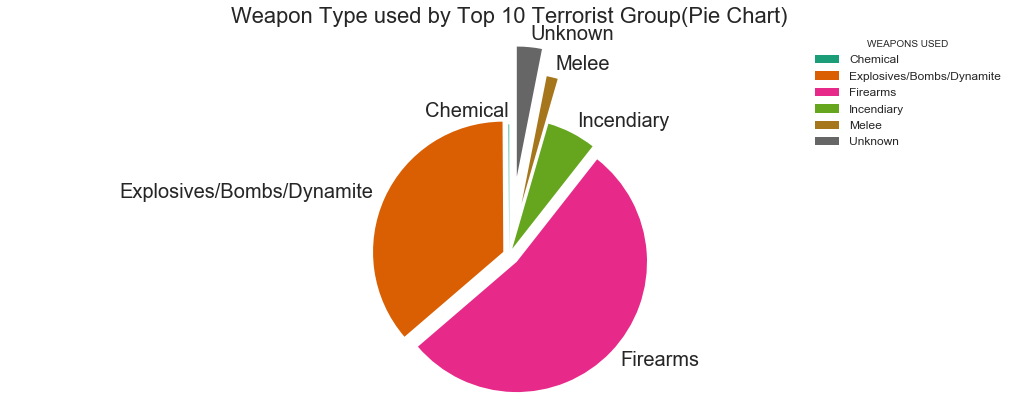

In [54]:
exniglode=(0.0, 0.05, 0.08, 0.04, 0.24,0.5)
v1=nig[nig['group'].isin(nig['group'].value_counts()[0:10].index)]
xattack=pd.crosstab(v1['weapon_type'],v1['group'],margins='All')
xattack
xattack=xattack[0:-1]
xattack.rename(columns={'All':''},inplace=True)
xattack.plot.pie(shadow=False,legend=False,y='',startangle=90,fontsize=20,figsize=(18,7),cmap='Dark2',grid=True,explode=explode)
plt.axis('equal')
plt.legend(title="WEAPONS USED",loc='best',fontsize='large')
plt.title('Weapon Type used by Top 10 Terrorist Group(Pie Chart)',fontsize = 22)

More than 50% of the attacks used Firearms.

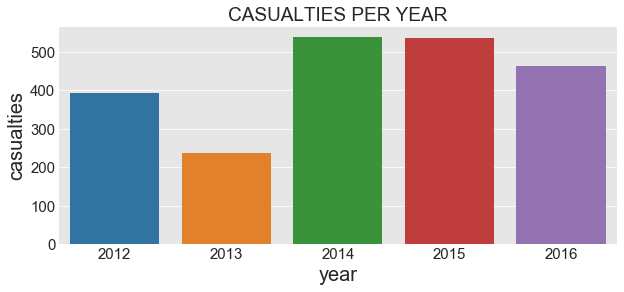

In [55]:
plt.figure(figsize=(10,4))
plt.title('CASUALTIES PER YEAR')
v1=nig['year'].value_counts().to_frame().reset_index().rename(columns={'index':'year','year':'casualties'}).sort_values(by='year')
sns.barplot(data=v1,x='year',y='casualties',ci=None)

2015 and 2014 saw almost same number of casualties

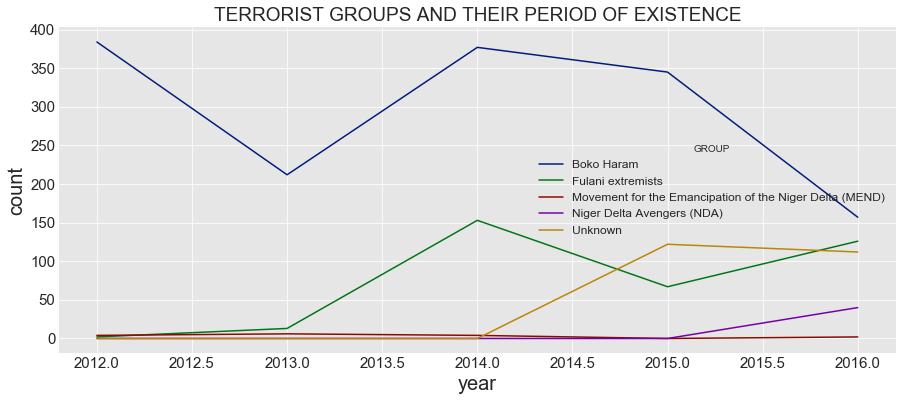

In [56]:
sns.set_style('darkgrid',{'axes.facecolor':'.9'})
pd.crosstab(nig[nig['group'].isin(nig['group'].value_counts()[0:5].index)]['year'],nig[nig['group'].isin(nig['group'].value_counts()[0:6].index)]['group']).plot(color=sns.color_palette('dark',5),figsize=(15,6))
plt.ylabel('count')
plt.title('TERRORIST GROUPS AND THEIR PERIOD OF EXISTENCE')
plt.legend(title="GROUP",loc=7,fontsize='large')

* Boko Haram showed sharp decrease in their attacks in 2013, then a rise next year, then again a slight fall in 2015, then a steep fall in 2016. 
* Fulani extremists suddenly came into existence in 2014, going down, then up, after that.
* Niger Delta Avengers came into limelight in 2016
* Hence there is no consistency in the attack number by all groups 

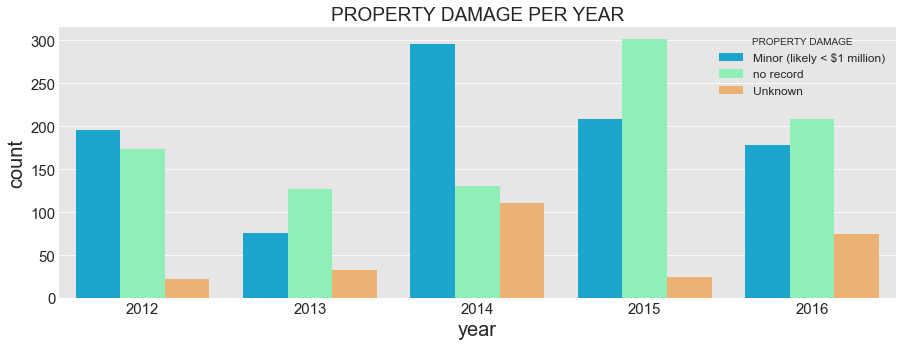

In [57]:
plt.figure(figsize=(15,5))
plt.title('PROPERTY DAMAGE PER YEAR')
sns.countplot(x='year',hue='property_damg',data=nig,palette='rainbow')
plt.legend(title="PROPERTY DAMAGE",loc=0,fontsize='large')

* Major property damage occured in 2014 
* No records for most attacks

In [58]:
print('Total Number of groups',nig.country.count())
n1=nig[nig.nationality=='Nigeria']
print('Number of groups with nationality as Nigeria:',n1.year.count())
print('% of terrorist groups in Nigeria belonging to Nigeria itself {0:.2f} %:'.format(n1.year.count()/nig.country.count()*100))

Total Number of groups 2163
Number of groups with nationality as Nigeria: 2139
% of terrorist groups in Nigeria belonging to Nigeria itself 98.89 %:
